In [21]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

if not 'BASE_DIR' in locals():
    BASE_DIR = os.path.abspath(os.curdir)

In [22]:
if os.path.abspath(os.curdir) == BASE_DIR:
    os.chdir('../')

dirname = os.path.abspath(os.curdir) + r'\data'
df = pd.read_csv(path.join(os.sep, dirname, 'Annual rainfall in Nottingham castle 1867  1939.csv'))
df.head()

,Unnamed: 0,x
0,1,29.90
1,2,25.33
2,3,27.75
3,4,17.93
4,5,26.83


In [23]:
df.describe()

,Unnamed: 0,x
count,73.000000,73.000000
mean,37.000000,24.791644
std,21.217131,4.487880
min,1.000000,15.640000
25%,19.000000,20.510000
50%,37.000000,25.000000
75%,55.000000,27.750000
max,73.000000,35.900000


<Figure size 1200x700 with 0 Axes>

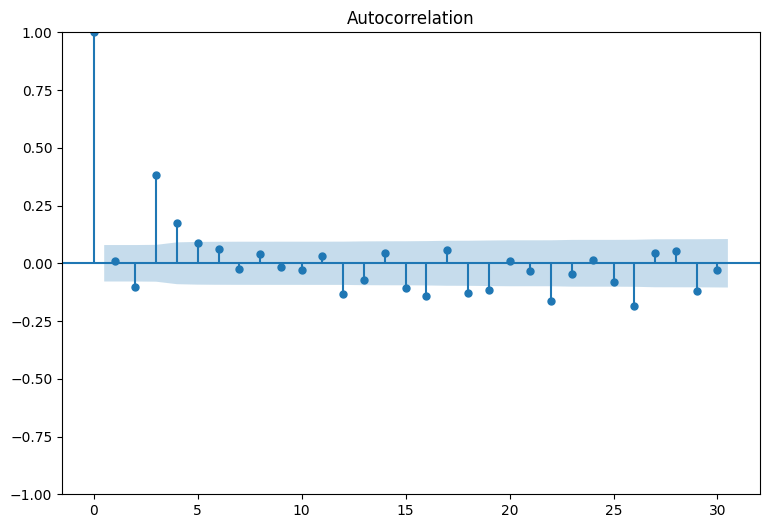

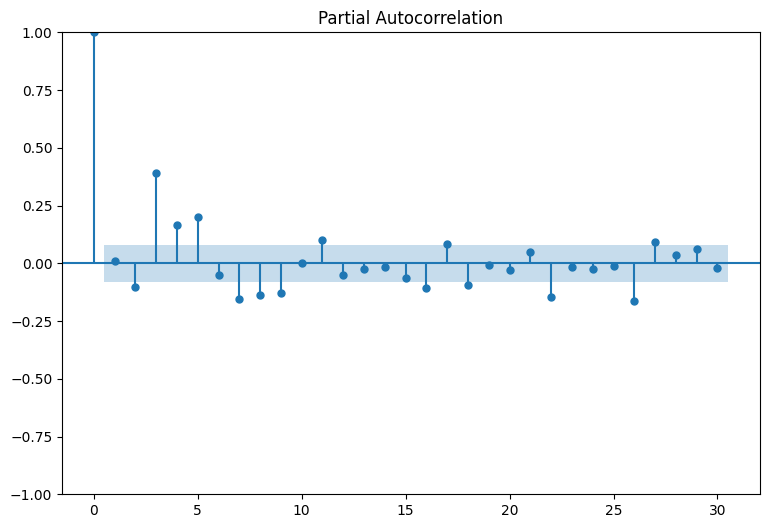

In [24]:
import statsmodels.tsa.api as smt
ts = df['x']
fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

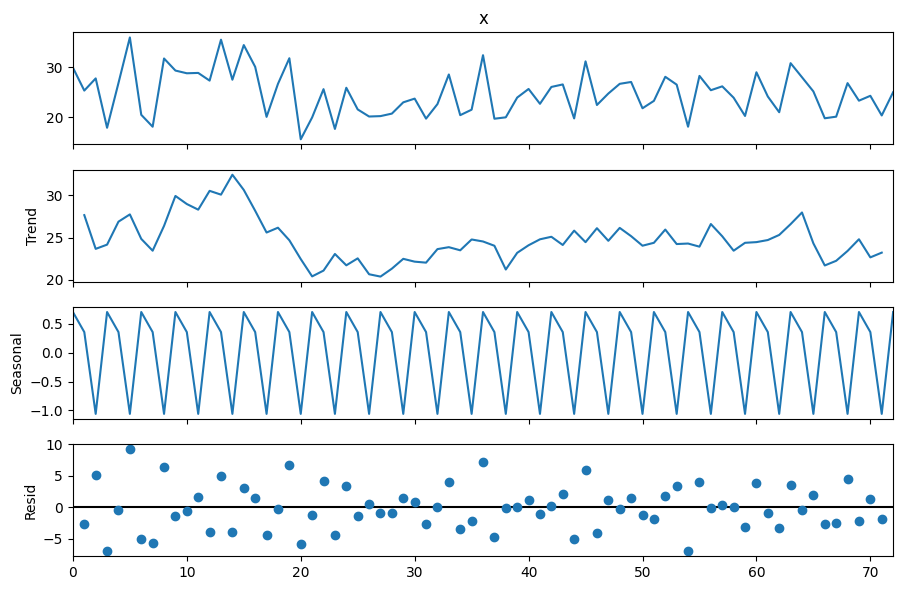

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']= 9, 6
decompose = seasonal_decompose(df['x'], period=3)
decompose.plot()
plt.show()

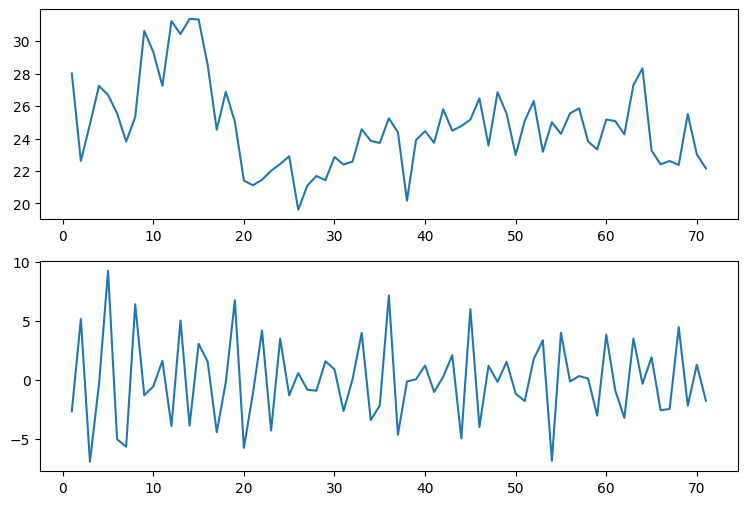

In [26]:
fg, axs = plt.subplots(nrows=2)
axs[0].plot(decompose.seasonal+decompose.trend)
axs[1].plot(decompose.resid)

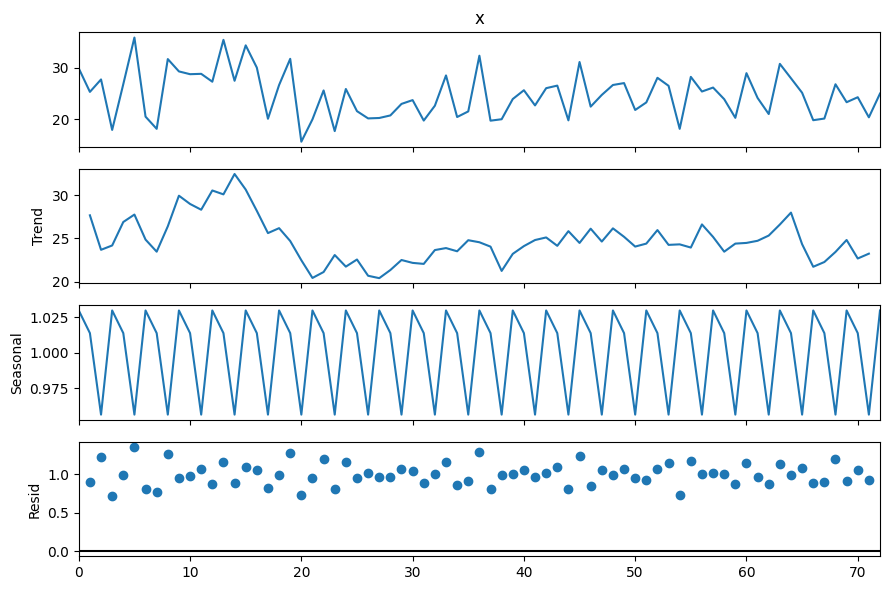

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']= 9, 6
decompose = seasonal_decompose(df['x'], period=3, model='multiplicative')
decompose.plot()
plt.show()

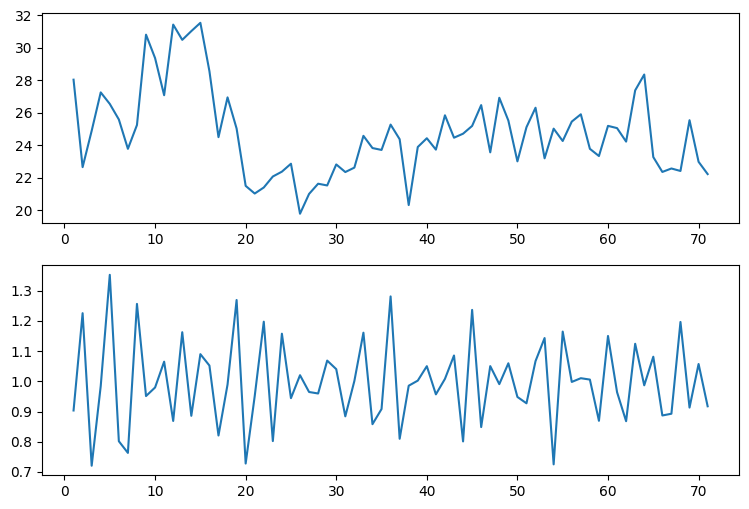

In [28]:
fg, axs = plt.subplots(nrows=2)
axs[0].plot(decompose.seasonal*decompose.trend)
axs[1].plot(decompose.resid)

<Axes: >

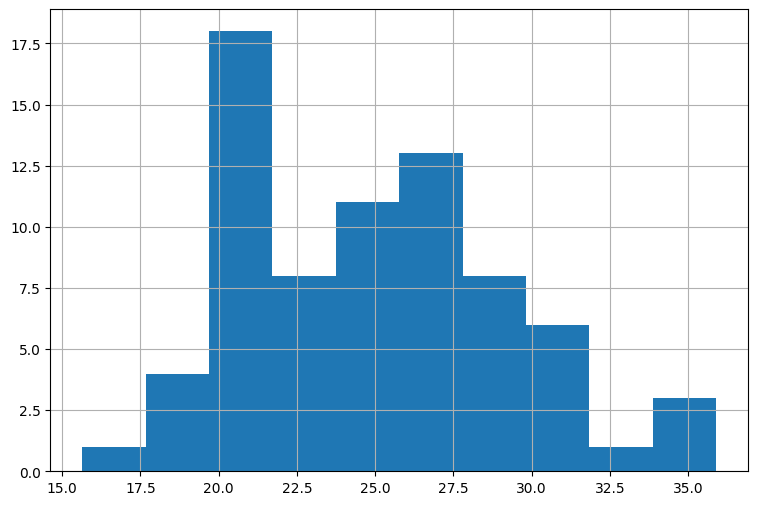

In [29]:
df['x'].hist()

<font size='1' >~~Вывод: в Ноттингеме ужасно дождливо~~</font><br>
Кажется, мультипликативное разложение лучше описывает данные

<Axes: >

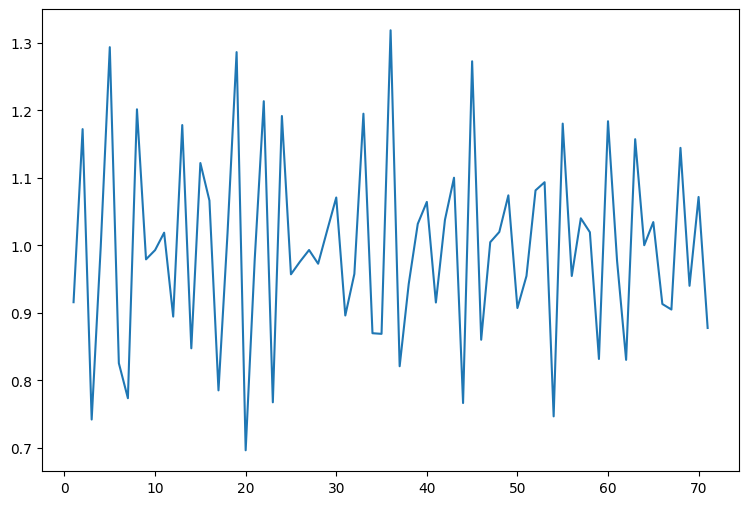

In [30]:
(decompose.seasonal * decompose.resid).plot()